<a href="https://colab.research.google.com/github/kapil0808/Kaggle-first-problem/blob/main/Customer_segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_customers_dataset.csv')
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [ ]:
items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_items_dataset.csv')
items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [ ]:
payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_payments_dataset.csv')
payments_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_orders_dataset.csv')
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [ ]:
products_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_products_dataset.csv')
products_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [ ]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_sellers_dataset.csv')
sellers_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [ ]:
categories_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/product_category_name_translation.csv')
categories_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [ ]:

dataframes = {'customers': customers_df,
              'items': items_df, 
              'payments': payments_df, 
              'orders': orders_df, 
              'products': products_df, 
              'sellers': sellers_df, 
              'categories': categories_df}
for i, j in dataframes.items():
    print(f'{i:12s} dataframe: {str(len(j)):7s} rows')

customers    dataframe: 99441   rows
items        dataframe: 112650  rows
payments     dataframe: 103886  rows
orders       dataframe: 99441   rows
products     dataframe: 32951   rows
sellers      dataframe: 3095    rows
categories   dataframe: 71      rows


In [ ]:
products_df = pd.merge(products_df, categories_df, on='product_category_name', how='left')
products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [ ]:
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products_df, on='product_id')
df = df.merge(sellers_df, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [ ]:
customer_by_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'])
customer_by_state.head(2)

,customer_state,customer_unique_id
21,RR,52
3,AP,84


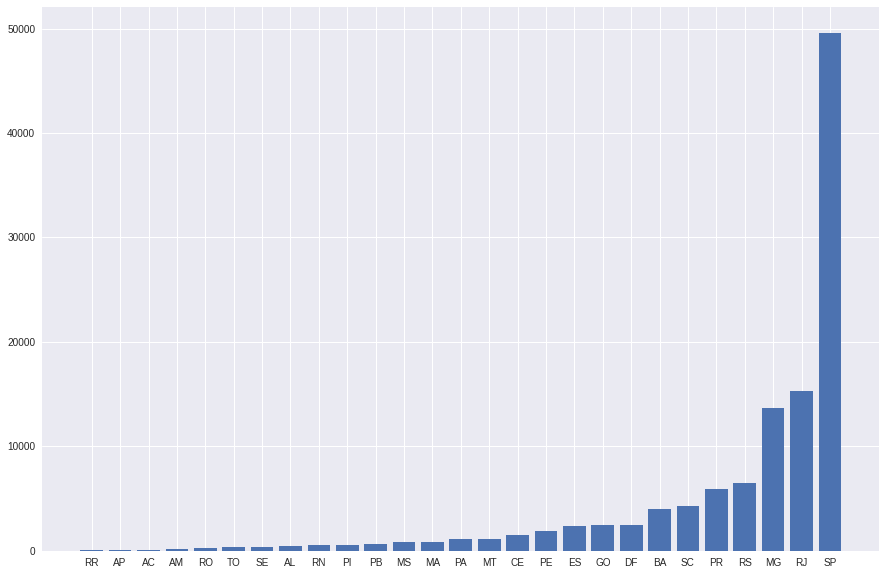

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.bar(customer_by_state['customer_state'], customer_by_state['customer_unique_id'])
plt.show()

We can see that most customers are from SP 

In [ ]:
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour
orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders.head(3)

,order_id,order_purchase_year,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,2017,10


In [ ]:
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
16,9,2016,3,9/2016
19,10,2016,381,10/2016
22,12,2016,1,12/2016


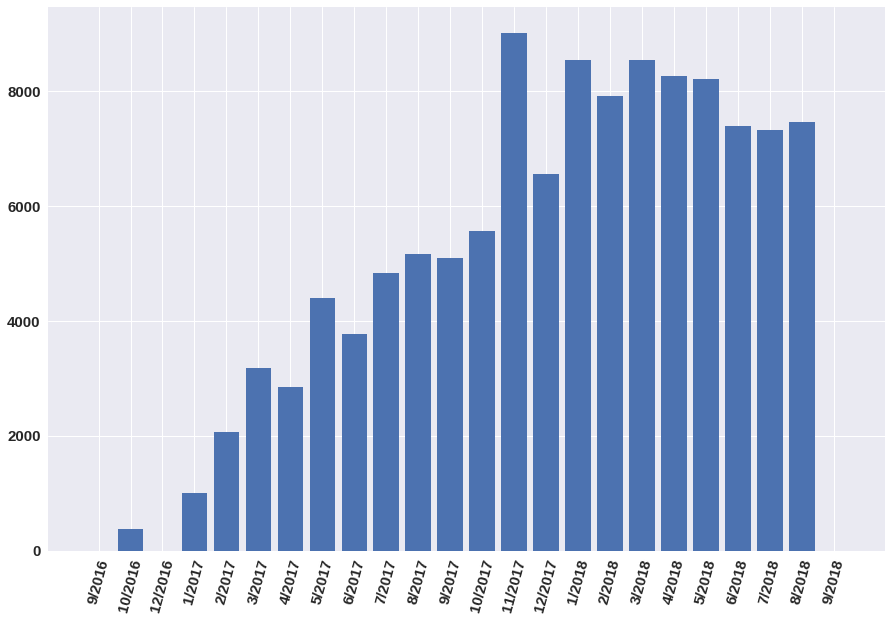

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [ ]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,31,385
2017,78,53539
2018,45,63677


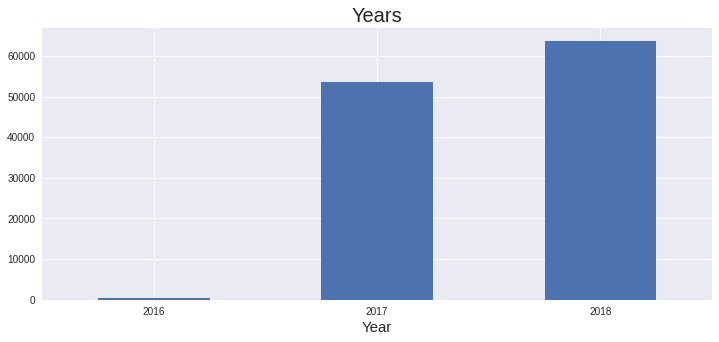

In [ ]:
df['Year'] = df['order_purchase_year']
df.groupby('Year').size().plot(kind = 'bar',figsize=(12,5));
plt.title('Years',fontsize=20);
plt.xlabel('Year',fontsize=15);
plt.xticks(rotation=0);

we can see that the year 2018 was the year with the most orders

In [ ]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


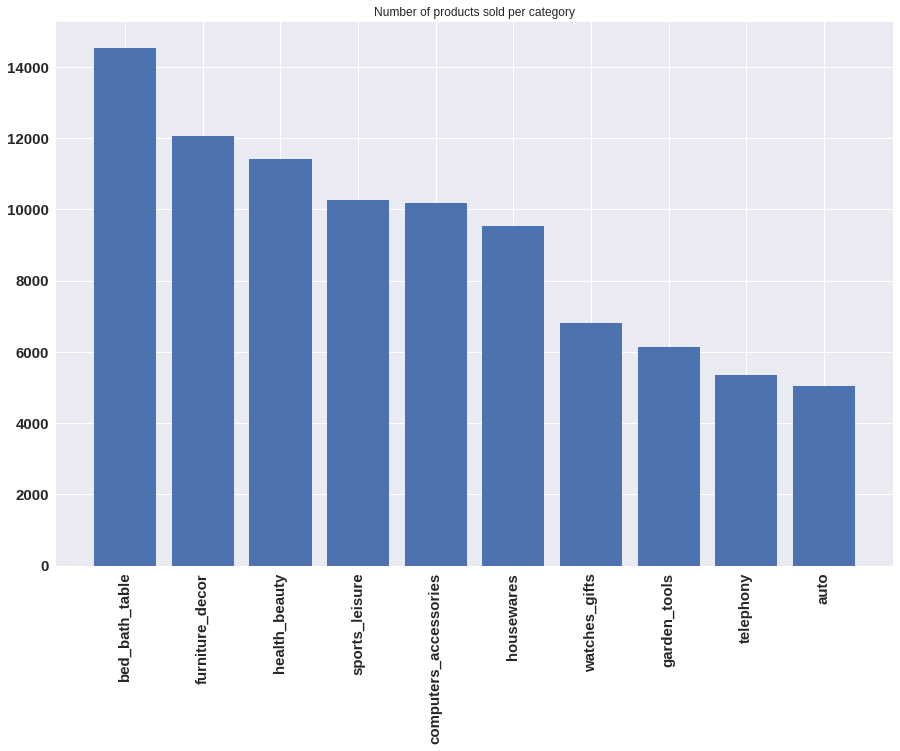

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=90, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [ ]:
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
           'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
df = df[columns]
df.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10,2,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10,2,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10,2,10
3,delivered,SP,1,29.99,7.78,1,credit_card,3,37.77,2017,8,15,18
4,delivered,SP,1,29.99,7.78,1,credit_card,1,37.77,2017,8,2,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_status          117601 non-null  object 
 1   customer_state        117601 non-null  object 
 2   order_item_id         117601 non-null  int64  
 3   price                 117601 non-null  float64
 4   freight_value         117601 non-null  float64
 5   payment_sequential    117601 non-null  int64  
 6   payment_type          117601 non-null  object 
 7   payment_installments  117601 non-null  int64  
 8   payment_value         117601 non-null  float64
 9   order_purchase_year   117601 non-null  int64  
 10  order_purchase_month  117601 non-null  int64  
 11  order_purchase_day    117601 non-null  int64  
 12  order_purchase_hour   117601 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 12.6+ MB


In [ ]:
df.isnull().sum()

order_status            0
customer_state          0
order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
order_purchase_year     0
order_purchase_month    0
order_purchase_day      0
order_purchase_hour     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
                  'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
cat_attributes = ['order_status', 'customer_state', 'payment_type']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(df).toarray()


In [ ]:
df_prepared.shape

(117601, 48)

In [ ]:
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced
df_reduced.shape
df_reduced

array([[-1.1768777 ,  1.50504758,  0.26302806, ...,  0.3649952 ,
         0.05161401,  0.00585954],
       [-1.41055659,  1.6570614 ,  1.84309361, ..., -0.24148197,
         0.11502053, -0.00197814],
       [-1.30775585,  1.58404812,  1.13150351, ..., -0.28276988,
         0.06582063, -0.01936228],
       ...,
       [ 1.84395294, -0.52977184,  0.68165431, ..., -0.02571775,
        -0.29421167,  0.02918   ],
       [ 0.71890064, -0.82312161,  0.12425324, ...,  0.2494945 ,
        -0.16111774,  0.70288449],
       [-1.20530372, -0.89686934,  0.201251  , ..., -1.01692179,
         0.0759553 , -0.05253303]])

In [ ]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

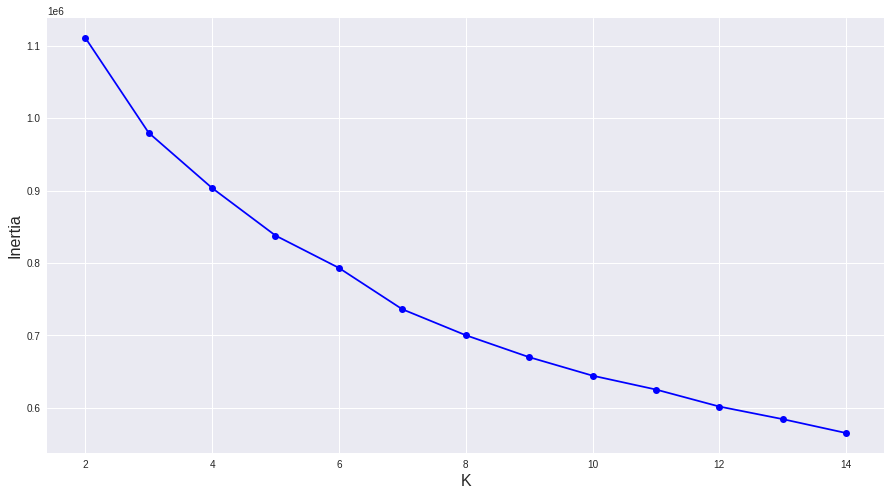

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]

In [ ]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

best_k

4

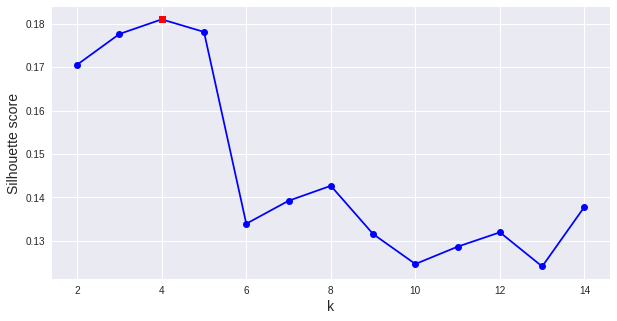

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

We can see that the best number of clusters is 4

In [ ]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
y_pred = best_model.fit_predict(df_reduced)

In [ ]:
for i in range(best_k):
    print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")

cluster 1 contains: 51225 customers
cluster 2 contains: 60638 customers
cluster 3 contains: 5026 customers
cluster 4 contains: 712 customers


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

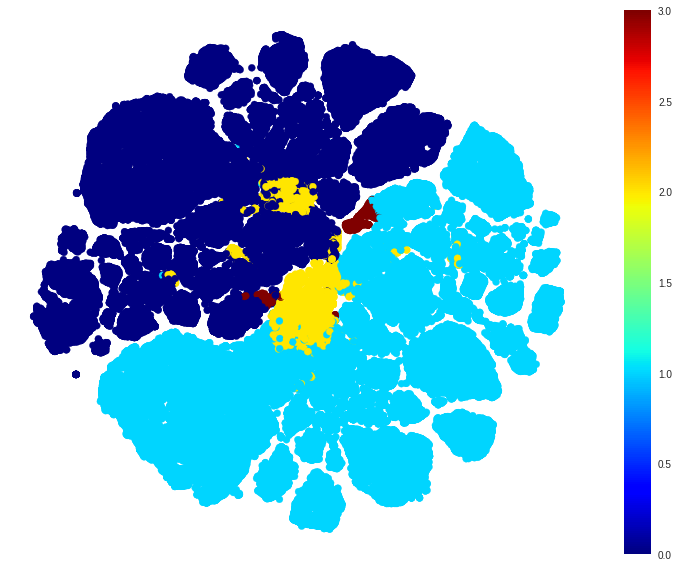

In [ ]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()